In [1]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("mysarahmadbhat/airbnb-listings-reviews")

#print("Path to dataset files:", path)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', palette='pastel')
plt.rcParams['figure.figsize'] = (12,6)

In [3]:
#LOAD DATASET

listings = pd.read_csv('E:\Projects\Airbnb_Lisitings & Reviews\Airbnb-Listing-Review\Airbnb Data\Listings.csv', encoding='latin1', low_memory=False)
reviews = pd.read_csv('E:\Projects\Airbnb_Lisitings & Reviews\Airbnb-Listing-Review\Airbnb Data\Reviews.csv')

<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:4: SyntaxWarning: invalid escape sequence '\P'
C:\Users\USER\AppData\Local\Temp\ipykernel_9564\2254346896.py:3: SyntaxWarning: invalid escape sequence '\P'
  listings = pd.read_csv('E:\Projects\Airbnb_Lisitings & Reviews\Airbnb-Listing-Review\Airbnb Data\Listings.csv', encoding='latin1', low_memory=False)
C:\Users\USER\AppData\Local\Temp\ipykernel_9564\2254346896.py:4: SyntaxWarning: invalid escape sequence '\P'
  reviews = pd.read_csv('E:\Projects\Airbnb_Lisitings & Reviews\Airbnb-Listing-Review\Airbnb Data\Reviews.csv')


In [4]:
#DATA CLEANING

#Standardize column names

listings.columns = listings.columns.str.strip().str.lower().str.replace(' ', '_')
reviews.columns = reviews.columns.str.strip().str.lower().str.replace(' ', '_')

In [5]:
#Parse date columns
reviews['date'] = pd.to_datetime(reviews['date'])

In [6]:
#Add last_review to listings

last_review = reviews.groupby('listing_id')['date'].max().reset_index()
last_review.rename(columns={'date': 'last_review'}, inplace=True)
listings = listings.merge(last_review, on='listing_id', how='left')

In [7]:
#Basic Overview

print('Listing shape', listings.shape)
print('Reviews shape', reviews.shape)

Listing shape (279712, 34)
Reviews shape (5373143, 4)


In [8]:
listings.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,last_review
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2017-07-23
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2016-05-08
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2015-07-01
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2015-01-04
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,2017-05-21


In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  object        
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [10]:
listings.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
listing_id,279712.0,NaN,NaN,NaN,26381955.489825,2577.0,13844618.75,27670985.0,39784850.75,48343530.0,14425758.688779
name,279537,265860,home away from home,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_id,279712.0,NaN,NaN,NaN,108165773.085531,1822.0,17206558.0,58269113.5,183285318.75,390187445.0,110856993.215897
host_since,279547,4240,2019-09-02,710,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_location,278872,7159,"Paris, Ile-de-France, France",47794,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_time,150930,4,within an hour,83464,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,150930.0,NaN,NaN,NaN,0.865939,0.0,0.9,1.0,1.0,1.0,0.283744
host_acceptance_rate,166625.0,NaN,NaN,NaN,0.827168,0.0,0.78,0.98,1.0,1.0,0.289202
host_is_superhost,279547,2,f,229294,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_total_listings_count,279547.0,NaN,NaN,NaN,24.581612,0.0,1.0,1.0,4.0,7235.0,284.041143


<Axes: title={'center': 'Missing Data Proportion'}>

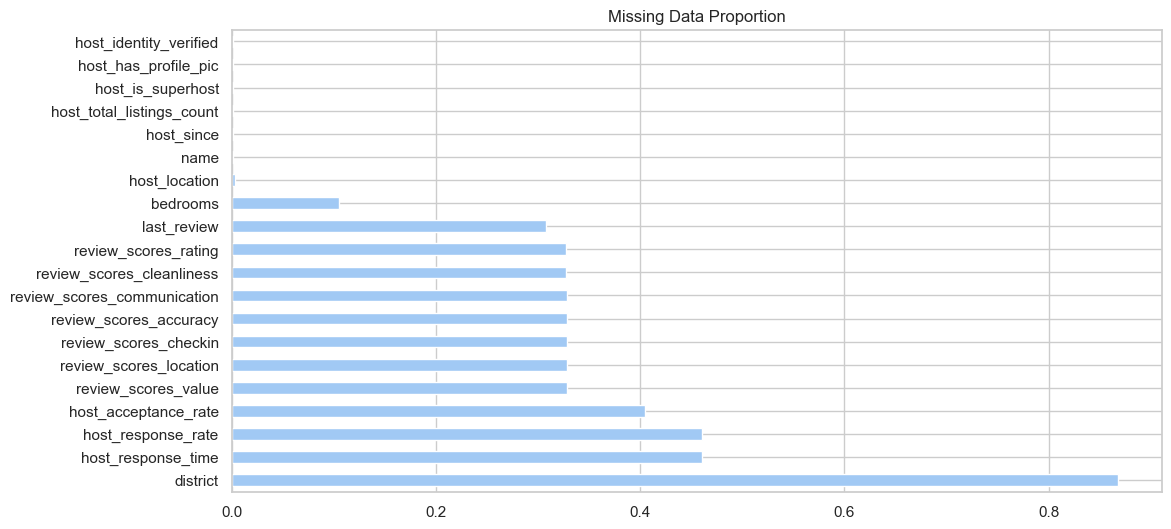

In [11]:
#Missing Values

missing = listings.isnull().mean().sort_values(ascending=False)
missing[missing > 0].plot(kind='barh', title='Missing Data Proportion')

Text(0.5, 1.0, 'Top 10 Cities by NUmber of Listings')

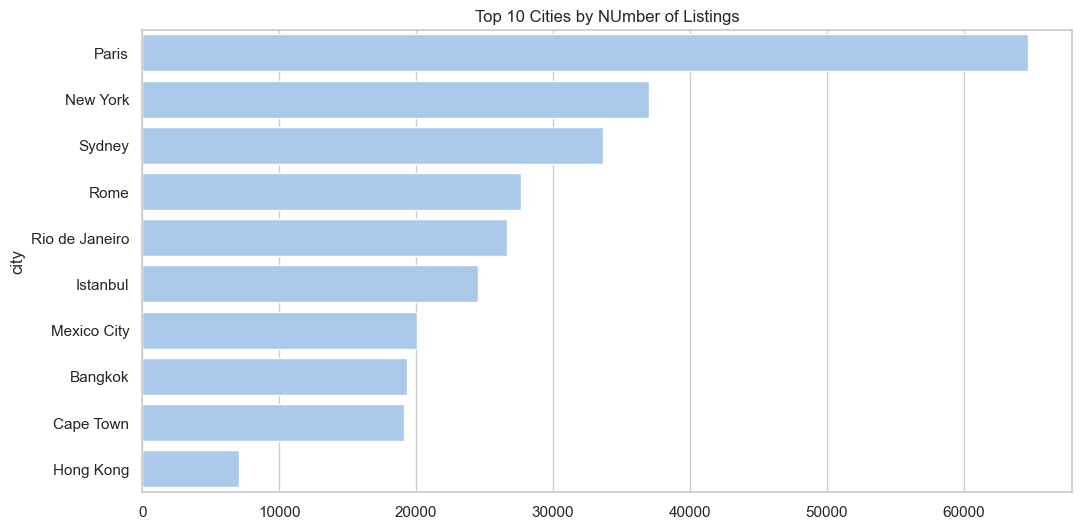

In [12]:
#Geographic Distribution

#Listings per City

city_counts = listings['city'].value_counts().head(10)
sns.barplot(x=city_counts.values, y=city_counts.index)
plt.title('Top 10 Cities by NUmber of Listings')

Text(0.5, 1.0, 'Geographic Distribution of Listings')

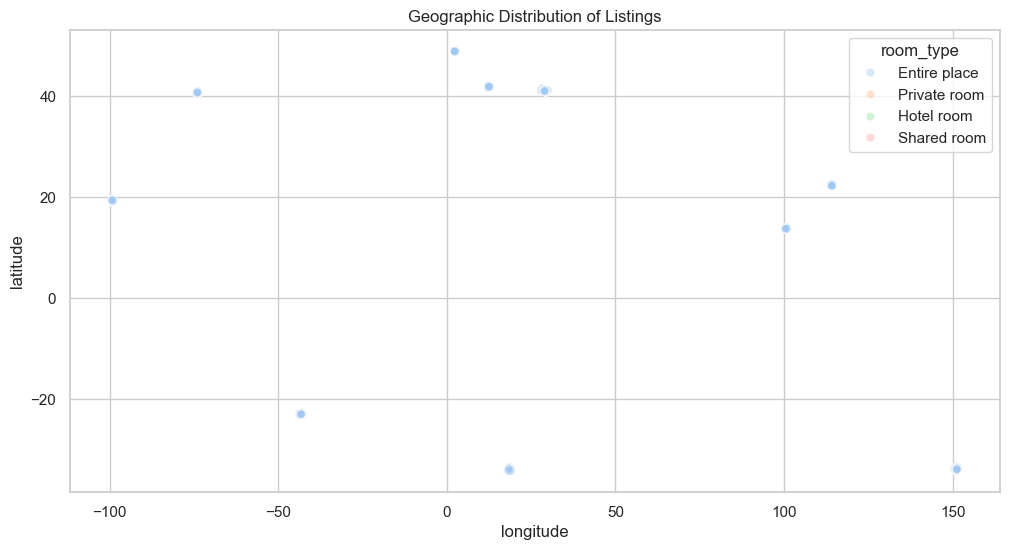

In [13]:
#Map of Listings (scatter plot)

sns.scatterplot(data=listings, x='longitude', y='latitude', hue='room_type', alpha=0.4)
plt.title('Geographic Distribution of Listings')

Text(0.5, 1.0, 'Distribution of Room Types')

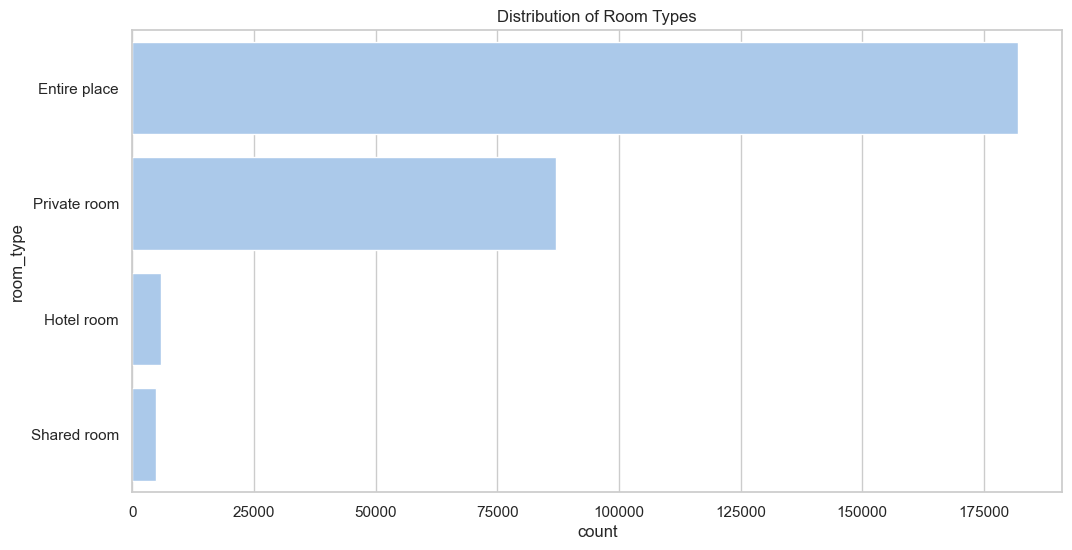

In [14]:
#1.Property & Room Types

sns.countplot(data=listings, y='room_type', order = listings['room_type'].value_counts().index)
plt.title('Distribution of Room Types')

Text(0.5, 1.0, 'Top Property Types')

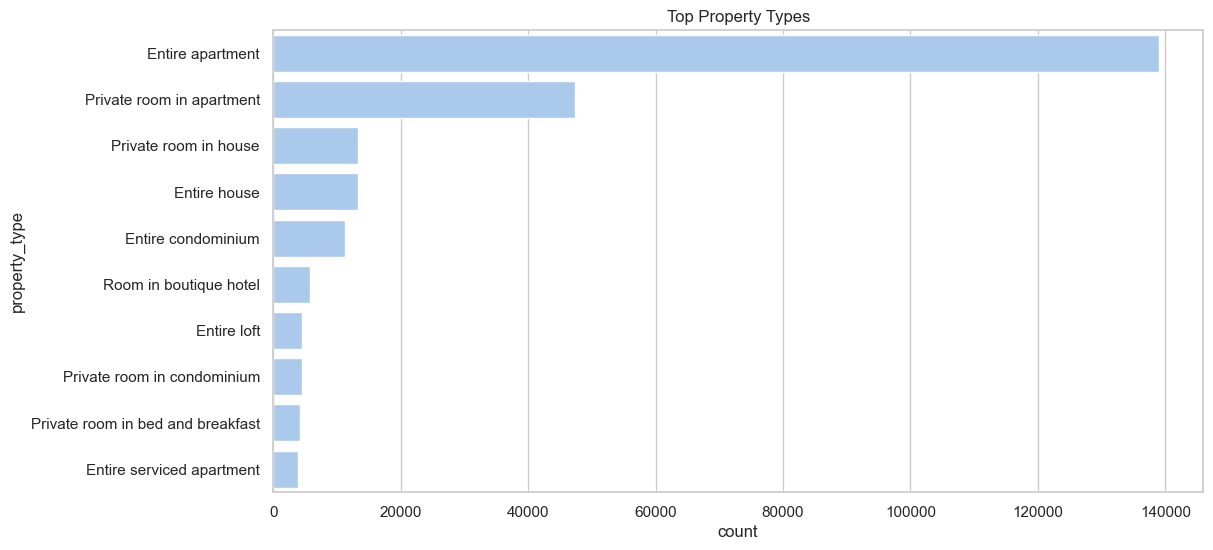

In [15]:
sns.countplot(data=listings, y='property_type', order=listings['property_type'].value_counts().head(10).index)
plt.title('Top Property Types')

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
C:\Users\USER\AppData\Local\Temp\ipykernel_9564\1297075689.py:3: SyntaxWarning: invalid escape sequence '\$'
  listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)


Text(0.5, 1.0, 'Price Distribution (clipped at $1000)')

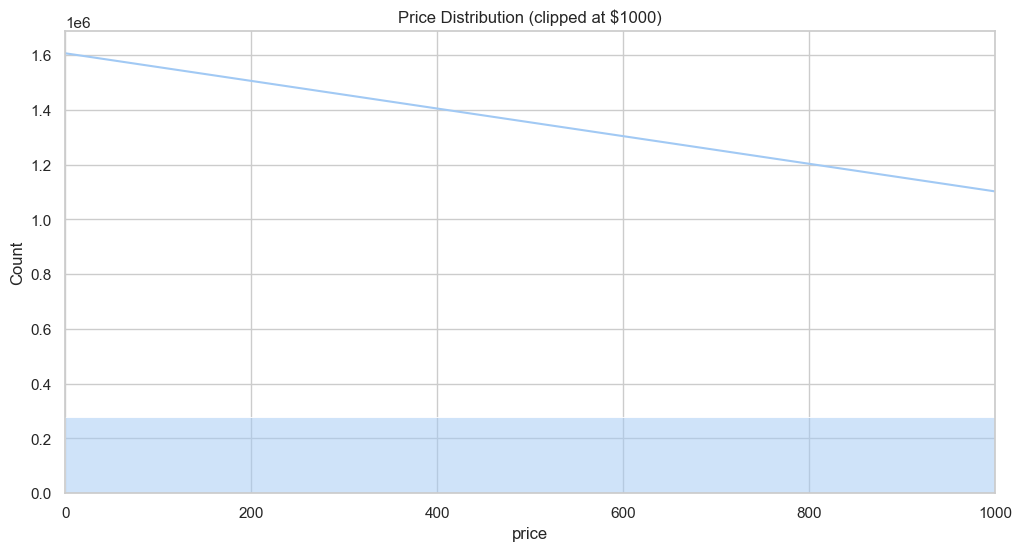

In [16]:
#1.Price Distribution

listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
sns.histplot(listings['price'], bins=100, kde=True)
plt.xlim(0, 1000)
plt.title('Price Distribution (clipped at $1000)')

Text(0.5, 1.0, 'COrrelation of Review Scores')

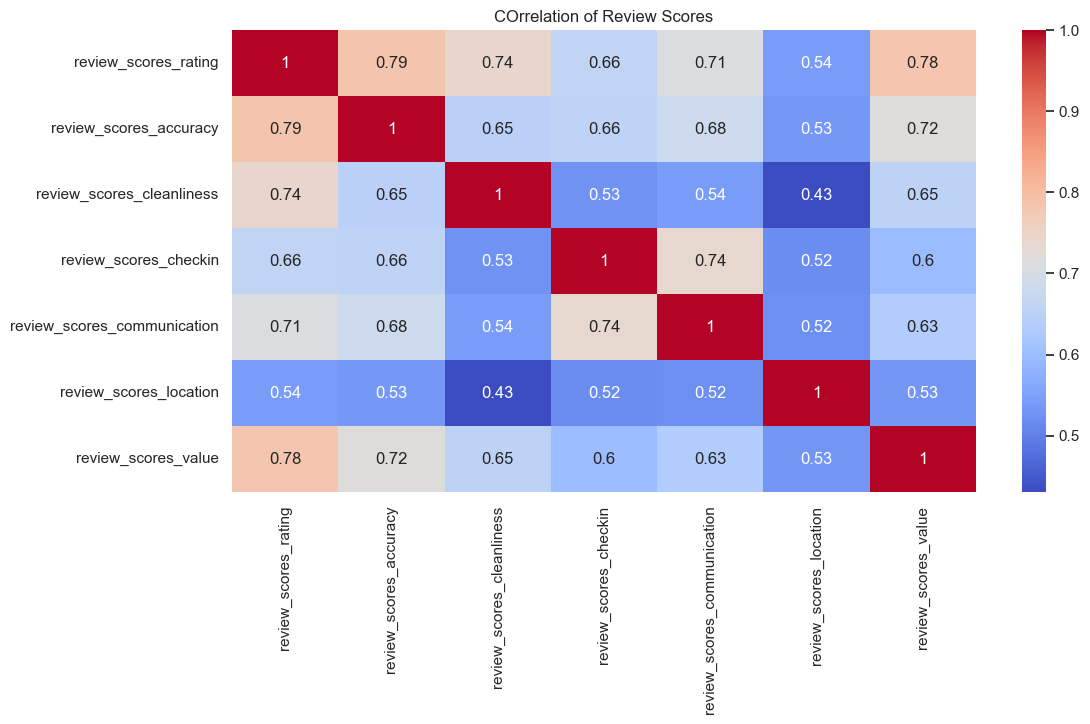

In [17]:
review_cols = [col for col in listings.columns if 'review_scores_' in col]

sns.heatmap(listings[review_cols].corr(), annot=True, cmap='coolwarm')
plt.title('COrrelation of Review Scores')

<Axes: title={'center': 'Number of Reviews Per Time'}, xlabel='year_month'>

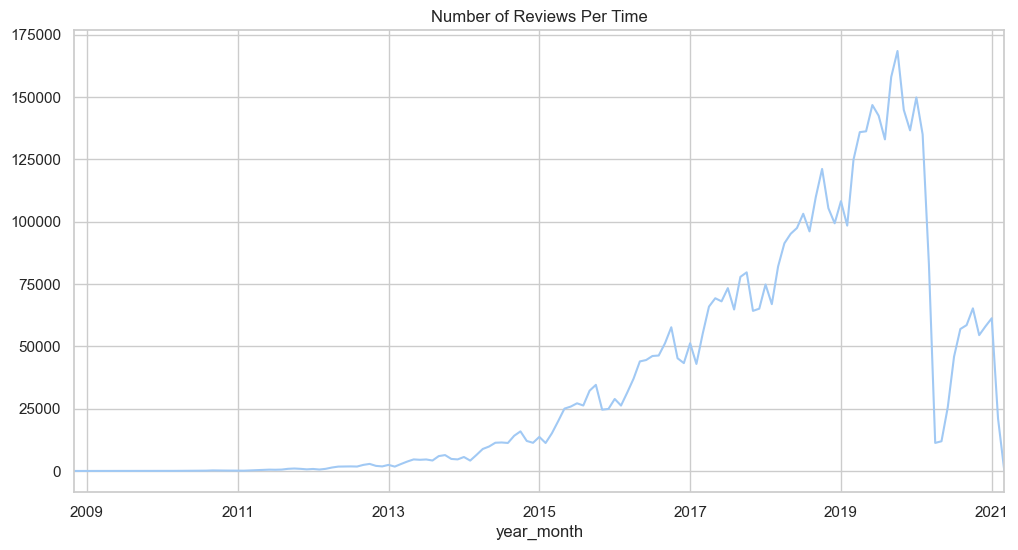

In [18]:
#1.Activity Over Time

reviews['year_month'] = reviews['date'].dt.to_period('M')
review_counts = reviews.groupby('year_month').size()
review_counts.plot(title='Number of Reviews Per Time')

In [19]:
#1. Top Listings by Rating & Reviews

top_listings = listings[['name', 'review_scores_rating', 'price']].sort_values(by='review_scores_rating', ascending=False).dropna().head(10)
top_listings

,name,review_scores_rating,price
279711,Cosy apartment with view on Canal St Martin,100.0,70.0
0,"Beautiful Flat in le Village Montmartre, Paris",100.0,53.0
1,39 mÃÂ² Paris (Sacre CÃ âur),100.0,120.0
279695,Charmant petit duplex au coeur du village Pernety,100.0,65.0
279694,Charming Flat at Nation - Paris - 50m2,100.0,80.0
279693,Charmant appartement parisien proche Tour Eiffel,100.0,90.0
279692,"Vue splendide face parc Buttes Chaumont, 2P 50m2.",100.0,80.0
279691,Sunny big flat . Paris centre,100.0,110.0
279690,"Appartement cosy - Paris, Butte aux Cailles",100.0,69.0
279689,Unique and luxury flat in the heart of Paris,100.0,80.0


In [20]:
top_reviewed = reviews['listing_id'].value_counts().head(10)
top_reviewed

listing_id
17222007    891
8637229     828
1249964     796
32011332    762
2399029     754
32678719    753
470817      717
24745583    710
865289      702
162163      700
Name: count, dtype: int64

In [21]:
listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)
df = listings[listings['price'] > 0]  # Remove free listings

<>:1: SyntaxWarning: invalid escape sequence '\$'
<>:1: SyntaxWarning: invalid escape sequence '\$'
C:\Users\USER\AppData\Local\Temp\ipykernel_9564\1402636613.py:1: SyntaxWarning: invalid escape sequence '\$'
  listings['price'] = listings['price'].replace('[\$,]', '', regex=True).astype(float)


In [22]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical = ['neighbourhood', 'room_type']
numeric = ['minimum_nights', 'availability_365', 'number_of_reviews']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numeric)
])

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target
categorical = ['neighbourhood', 'room_type']
numeric = ['minimum_nights', 'bedrooms', 'accommodates', 'review_scores_rating', 'review_scores_cleanliness']

# Drop rows with missing values in selected columns
df_model = df[categorical + numeric + ['price']].dropna()
df_model.to_csv("clean_airbnb.csv", index=False)

X = df_model[categorical + numeric]
y = df_model['price']

# Preprocessing pipeline
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('num', StandardScaler(), numeric)
])

# Combine with model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42))
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Fit the model
pipeline.fit(X_train, y_train)

# Evaluate
print("Model R² Score on test data:", pipeline.score(X_test, y_test))


Model R² Score on test data: -0.1475383903863623


In [24]:
import joblib

joblib.dump(pipeline, 'price_model.pkl')
print('✅ Model trained and saved.')

✅ Model trained and saved.


In [25]:
import folium

map_center = [df.latitude.mean(), df.longitude.mean()]
m = folium.Map(location=map_center, zoom_start=12)

for _, row in df.sample(500).iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f'${row['price']} - {row['room_type']}'
    ).add_to(m)

m.save('airbnb_map.html')

In [26]:
import streamlit.components.v1 as components
components.html(open('airbnb_map.html', 'r').read(), height=600)

2025-05-28 17:38:47.046 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-28 17:38:48.028 
  command:

    streamlit run c:\Users\USER\.conda\envs\airenv\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-05-28 17:38:48.029 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [30]:
import plotly.express as px
fig = px.scatter_map(
    df.sample(500),
    lat='latitude',
    lon='longitude',
    color='price',
    hover_name='name',
    zoom=10,
    map_style='carto-positron'  # corrected style
)

fig.show()

ValueError: could not convert string to float: 'Buttes-Montmartre'